<a href="https://colab.research.google.com/github/OULEDDEHOU/Time-Series-Forcasting-with-Regular-Neuron-Network/blob/main/Comment_utiliser_un_R%C3%A9seau_de_Neurones_R%C3%A9guli%C3%A8re_pour_faire_des_pr%C3%A9dictions_sur_notre_Airpassengers_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [ ]:
from  google.colab import files
import io

In [ ]:
uploaded = files.upload()

Saving AirPassengers.csv to AirPassengers.csv


In [ ]:
data = pd.read_csv(io.BytesIO(uploaded['AirPassengers.csv']),usecols=[1]) 

In [ ]:
print(data.dtypes)

#Passengers    int64
dtype: object


In [ ]:
data = data.rename(columns={"#Passengers":"Passengers"})

In [ ]:
data.head(5)

,Passengers
0,112
1,118
2,132
3,129
4,121


In [ ]:
dataset = data.values
dataset = dataset.astype('float32')

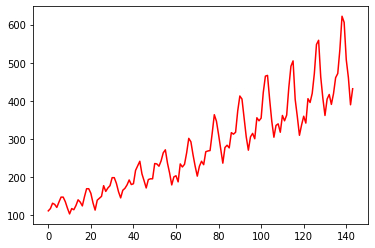

In [ ]:
plt.plot(dataset,c="r")

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)

In [ ]:
train_size = int(len(dataset)*0.66)
train,test = dataset[:train_size],dataset[train_size:]

In [ ]:
def to_sequences(dataframe , seq_size = 1):
    X = []
    y = []
    for i in range(len(dataframe)-seq_size-1):
        w = dataframe[i:(i+seq_size),0]
        X.append(w)
        y.append(dataframe[i+seq_size,0])
        
    return np.array(X),np.array(y)

In [ ]:
seq_size = 5

In [ ]:
train_X,train_y = to_sequences(train , seq_size)
test_X,test_y = to_sequences(test , seq_size)

In [ ]:
model = Sequential()
model.add(Dense(70,input_dim=seq_size , activation='relu'))
model.add(Dense(35, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['acc'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 70)                420       
                                                                 
 dense_1 (Dense)             (None, 35)                2485      
                                                                 
 dense_2 (Dense)             (None, 1)                 36        
                                                                 
Total params: 2,941
Trainable params: 2,941
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model.fit(train_X,train_y,validation_data=(test_X,test_y), verbose=2,epochs=100)

Epoch 1/100
3/3 - 1s - loss: 0.0909 - acc: 0.0112 - val_loss: 0.4455 - val_acc: 0.0000e+00 - 1s/epoch - 435ms/step
Epoch 2/100
3/3 - 0s - loss: 0.0622 - acc: 0.0112 - val_loss: 0.3044 - val_acc: 0.0000e+00 - 33ms/epoch - 11ms/step
Epoch 3/100
3/3 - 0s - loss: 0.0384 - acc: 0.0112 - val_loss: 0.1955 - val_acc: 0.0000e+00 - 32ms/epoch - 11ms/step
Epoch 4/100
3/3 - 0s - loss: 0.0224 - acc: 0.0112 - val_loss: 0.1190 - val_acc: 0.0000e+00 - 33ms/epoch - 11ms/step
Epoch 5/100
3/3 - 0s - loss: 0.0127 - acc: 0.0112 - val_loss: 0.0692 - val_acc: 0.0000e+00 - 32ms/epoch - 11ms/step
Epoch 6/100
3/3 - 0s - loss: 0.0078 - acc: 0.0112 - val_loss: 0.0414 - val_acc: 0.0233 - 33ms/epoch - 11ms/step
Epoch 7/100
3/3 - 0s - loss: 0.0059 - acc: 0.0112 - val_loss: 0.0285 - val_acc: 0.0233 - 32ms/epoch - 11ms/step
Epoch 8/100
3/3 - 0s - loss: 0.0063 - acc: 0.0112 - val_loss: 0.0242 - val_acc: 0.0233 - 37ms/epoch - 12ms/step
Epoch 9/100
3/3 - 0s - loss: 0.0069 - acc: 0.0112 - val_loss: 0.0231 - val_acc: 0.023

In [ ]:
trainPredict = model.predict(train_X)
testPredict = model.predict(test_X)

2/2 [==============================] - 0s 6ms/step


In [ ]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY_inverse = scaler.inverse_transform([train_y])

In [ ]:
testPredict = scaler.inverse_transform(testPredict)
testY_inverse = scaler.inverse_transform([test_y])

In [ ]:
trainScore = math.sqrt(mean_squared_error(trainY_inverse[0],trainPredict[:,0]))
print(f'Train Score : {trainScore} RMSE')

Train Score : 21.210930741147674 RMSE


In [ ]:
testScore = math.sqrt(mean_squared_error(testY_inverse[0], testPredict[:,0]))
print(f'Test Score : {testScore} RMSE')

Test Score : 43.766612673424525 RMSE


In [ ]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[seq_size : len(trainPredict)+seq_size , :] = trainPredict

In [ ]:
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(seq_size*2)+1:len(dataset)-1, :] = testPredict

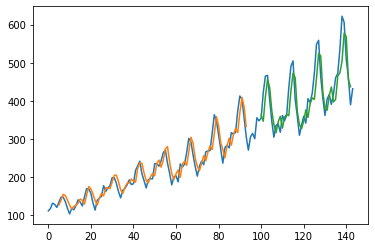

In [ ]:
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()